# Demo Topic Modeling

Topic Modeling is a classical technique in Natural Language Processing to extract meaning from a large bunch of documents

In [14]:
import pandas as pd
from bunkatech.topic_modeling import TopicModeling
from sklearn.datasets import fetch_20newsgroups
import warnings
warnings.filterwarnings('ignore')
 
    
data = pd.read_csv('../data/imdb.csv', index_col = [0])
data = data.sample(2000, random_state = 42)

#### Instantiate the function

In [15]:
topics = TopicModeling(data = data,
                        text_var = 'description',
                        index_var = 'imdb',
                        extract_terms=True,
                        terms_embedding=True,
                        docs_embedding=True,
                        sample_size_terms=2000,
                        terms_limit=2000,
                        terms_ents=False,
                        terms_ngrams=(2, 2),
                        terms_ncs=False,
                        terms_include_pos=["NOUN", "PROPN", "ADJ"],
                        terms_include_types=["PERSON", "ORG"],
                        terms_embedding_model="all-MiniLM-L6-v2",
                        docs_embedding_model="all-MiniLM-L6-v2",
                        language="en",
                        terms_path=None,
                        docs_dimension_reduction = 5,
                        terms_embeddings_path=None,
                        docs_embeddings_path=None,
                        docs_multiprocessing = True,
                        terms_multiprocessing = True)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|                                                                 | 0/1991 [00:00<?, ?it/s]2022-03-30 15:32:35,137 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:32:35,138 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:32:35,157 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:32:35,170 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:32:35,178 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:32:35,180 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:32:35,183 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
2022-03-30 15:32:35,188 - INFO : loaded 'en_core_web_sm' spaCy language pipeline
100%|█████████████████████████████████████████████████████| 1991/1991 [00:09<00:00, 209.41it/s]
2022-03-30 15:32:37,804 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-30 15:32:43,978 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

2022-03-30 15:32:51,978 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2


Start Embedding...


2022-03-30 15:32:58,416 - INFO : Use pytorch device: cpu
2022-03-30 15:32:58,417 - INFO : CUDA is not available. Start 4 CPU worker
2022-03-30 15:32:58,417 - INFO : Start multi-process pool on devices: cpu, cpu, cpu, cpu


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2022-03-30 15:33:03,476 - INFO : Chunk data into packages of size 50


UMAP(n_components=5, verbose=True)
Wed Mar 30 15:33:18 2022 Construct fuzzy simplicial set
Wed Mar 30 15:33:20 2022 Finding Nearest Neighbors
Wed Mar 30 15:33:20 2022 Finished Nearest Neighbor Search
Wed Mar 30 15:33:20 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Mar 30 15:33:22 2022 Finished embedding


#### Get the Topic Number & Topic Top Terms to describe them

In [18]:
df_topics = topics.get_clusters(topic_number=15, top_terms = 5)
df_topics

,cluster,cluster_name,topic_size
0,7,police officer | gang leader | taxi driver | t...,196
1,13,best man | best friend | married couple | marr...,195
2,2,true story | love stories | classical music | ...,180
3,9,serial killer | police detective | private inv...,166
4,0,single mother | new life | college graduate | ...,147
5,3,fairy tale | santa claus | mr. miyagi | feudal...,144
6,14,alien race | jack sparrow | fighter pilot | my...,136
7,5,dead body | perilous journey | theme park | po...,131
8,8,twin brothers | divorced parents | family dyna...,127
9,12,high school | boarding school | street dancer ...,117


#### Visualize the topics in 2 Dimensions

UMAP( verbose=True)
Wed Mar 30 15:33:53 2022 Construct fuzzy simplicial set
Wed Mar 30 15:33:55 2022 Finding Nearest Neighbors
Wed Mar 30 15:33:55 2022 Finished Nearest Neighbor Search
Wed Mar 30 15:33:55 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Wed Mar 30 15:33:57 2022 Finished embedding


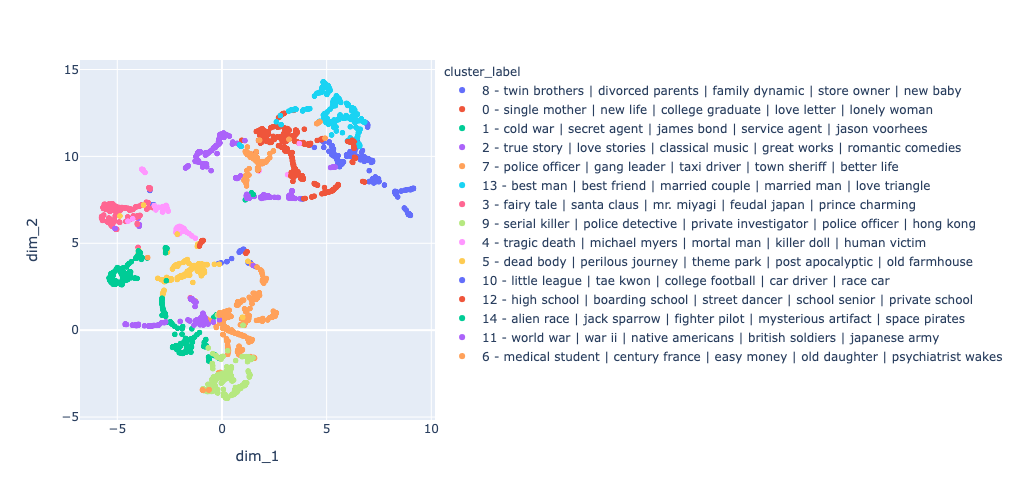

In [20]:
fig = topics.visualize_topics_embeddings(width= 1000, height = 500)
fig.show()

#### Display the evolution of topics in time

In [30]:
fig_temporal = topics.temporal_topics(date_var = 'year', 
                             width=1000,
                            height=500,
                            normalize_y=True, # Normalize to compare the distribution of topcis by time period
                            min_range=2010,
                            max_range=2018)

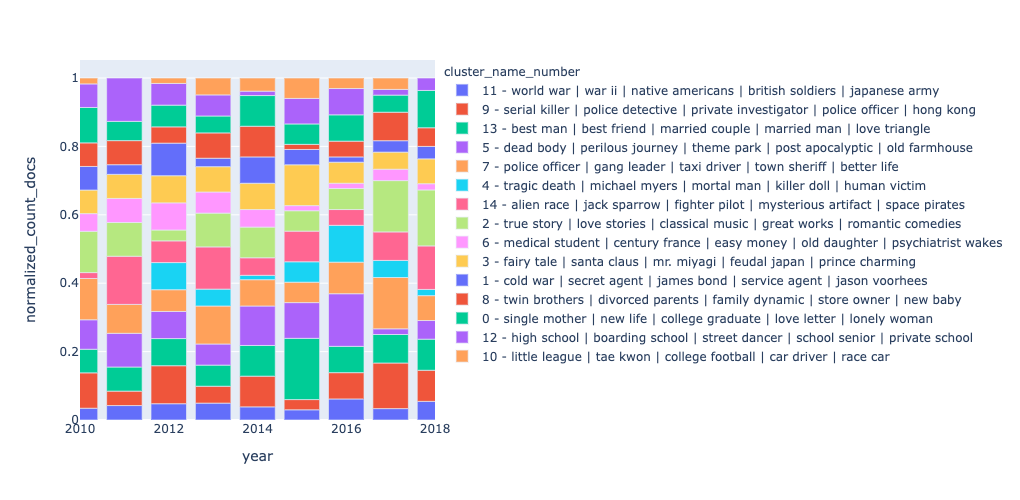

In [31]:
fig_temporal.show()

#### Compute the centroids topics

In [41]:
df_centroids = topics.get_centroid_documents(top_elements = 3)



cluster_name = df_centroids['clusters'].iloc[0]
center_docs = df_centroids[df_centroids['clusters'] == cluster_name]['centroid_docs'].iloc[0]

print(f"The most centered documents of the topic calles {cluster_name} are the following: ")
center_docs.split(' || ')

The most centered documents of the topic calles 0 - single mother | new life | college graduate | love letter | lonely woman are the following: 


['A young newspaper writer returns to her hometown in the English countryside, where her childhood home is being prepped for sale.',
 'Julie Kohler is prevented from suicide by her mother. She leaves the town. She will track down, charm and kill five men who do not know her. What is her goal? What is her purpose?',
 'Maria Altmann, an octogenarian Jewish refugee, takes on the Austrian government to recover artwork she believes rightfully belongs to her family.']